# **Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning.**

Daniel Flores Rodríguez - A01734184

In [26]:
# importamos las librerias mas usadas de python para poder trabajar la visualizacion de datos y la manipulacion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

# Librerias relacionadas con la realizacion del modelo y la preparacion del dataset correspondiente
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Importamos ImageDataGenerator para el tratamiento de las imagenes que vamos a analizar.
from keras.preprocessing.image import ImageDataGenerator

# Configuración de la libreria matplotlib a "inline" y mostramos graficas debajo de la celda 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#Librerias de deep learing
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 

 #importamos tensorflow
import tensorflow as tf
import random as rn

# Manipulacion de imagenes en crudo y archivos comprimidos y de más.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [27]:
#Montamos la direccion/directorio de donde se encuentran nuestras carpetas con las imagenes de los dinosaurios.

from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/ITESM/Septimo Semestre/Implementación de un modelo de deep learning"

%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITESM/Septimo Semestre/Implementación de un modelo de deep learning
ankylosaurus/  DinosaursOringinal.ipynb          model_I.png   trex/
brontosaurus/  DinosaursOringinalMejorado.ipynb  pterodactyl/  triceratops/


In [28]:
#realizamos un array con los nombres de nuestras clases/carpetas donde se encuentran las imagenes.

dinosaurs = ["ankylosaurus","brontosaurus","pterodactyl","trex","triceratops"]


In [29]:
# a continuacion se crean los arreglos / matrices en donde guardaremos valores relacionados con las imagenes.

# En la variable x se almacenara la imagen 'descompuesta' de tal manera que podemos trabajar con estas.
X = [] 

#Se almacenará el indice de las imagenes a manera de posicion y con el nombre de la clase (carpeta) de donde viene dicha/s imagen/es.
Z = []

# Definimos el tamaño de la imagen para poder trabajar y poderles hacer resize mas adelante.
img_size = 225

In [30]:
#definimos una funcion que nos ayuda a poder convertir la imagen en matriz y ademas creamos el indice de estas.

def train_test_img(especie, PD):
  for img in tqdm(os.listdir(PD)):
    nombre = especie
    path = os.path.join(PD, img) #obtenemos el path del archivo.
    img = cv2.imread(path, cv2.IMREAD_COLOR) #leemos la imagen
    img = cv2.resize(img, (img_size, img_size)) #reajustamos el tamaño de la imagen
    
    #se van agregando a los arreglos que se declararon anteriormente
    X.append(np.array(img))
    Z.append(str(nombre))

In [31]:
# en esta parte invocamos la funcion que acabamos de crear y le enviamos sus respectivos parametros.
for dino in dinosaurs:
  dir = './'+dino
  train_test_img(dino, dir)

100%|██████████| 40/40 [00:00<00:00, 94.27it/s] 


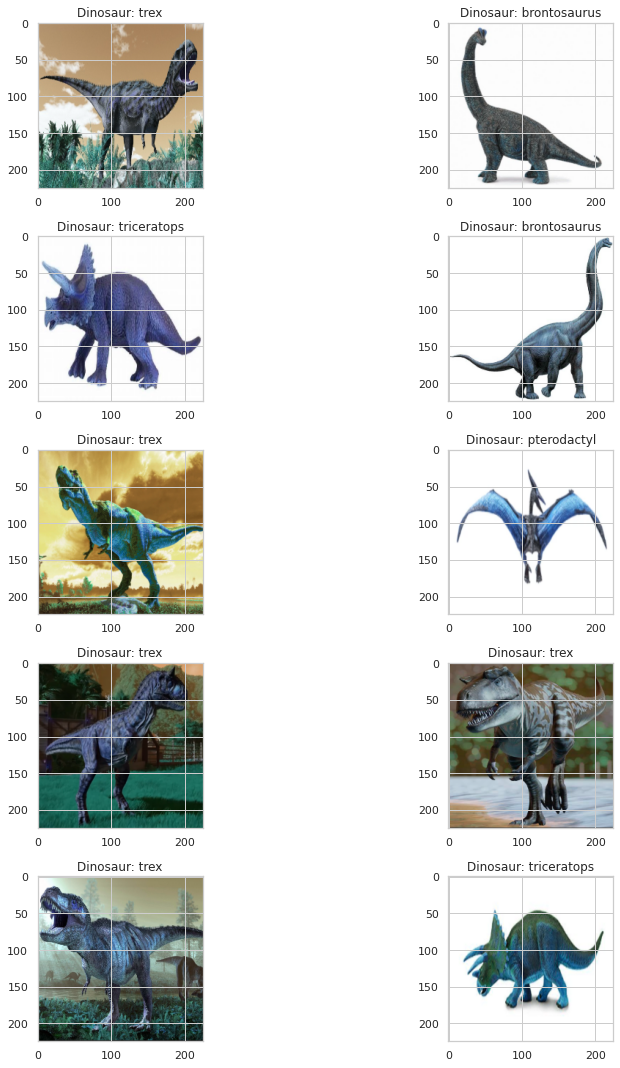

In [32]:
# Se imprimen unas cuantas imagenes, solo para comprobar que efectivamente estamos leyendolas y almacenandolas
# elejimos aquellas imagenes a mostrar de manera aleatoria.

figura,axes=plt.subplots(5,2)
figura.set_size_inches(15,15)

for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        axes[i,j].imshow(X[l])
        axes[i,j].set_title('Dinosaur: '+Z[l])
        
plt.tight_layout()

In [33]:

# Debuido a que queremos trabajar con la etiqueta (nombre de carpetas donde tenemos guardadas las imagenes)
# realizamos un Label encoder, que nos ayudara a trabajar con una cadena de texto "transformada"

label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)

#Finalmente y para no tener cantidades grandes de procesamiento, se realiza una division, de tal manera que los valores de las imagenes queden mas pequeños, pero con la misma escala
# la cantidad se debe al codigo de los colores rgb
X=X/255

In [34]:
# se realiza en split de los datos.

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [35]:
# En este caso, definimos unos de los hiperparametros mas importantes para poder realizar CNN, las epocas y el tamaño del batch.
# El cambio mas notable lo podremos ver aqui, ya que al reducir el numero de batches y al aumentar las epocas del modelo, se puede ver una mejoria en cuanto a la precision del modelo.

batch_size=30
epochs=15

In [36]:
#limpiamos la sesion de keras
K.clear_session()


# Empezamos a modelar nuestro modelo a traves de CNN.
# Ademas del cambio mencionado anteriormente se agrega otra capa convolucional al modelo
modelo = Sequential()
modelo.add(Conv2D(filters = 32, kernel_size = (5,5),padding='Same',activation='relu', input_shape = (225,225,3)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

modelo.add(Conv2D(filters = 64, kernel_size = (3,3),padding='Same',activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

modelo.add(Conv2D(filters = 128, kernel_size = (3,3),padding='Same',activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(512))
modelo.add(Activation('relu'))
modelo.add(Dense(5, activation = "softmax"))

In [37]:
#posterior de haber armado o preparado nuestro modelo, podemos compilarlo como se muestra a continuacion

modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

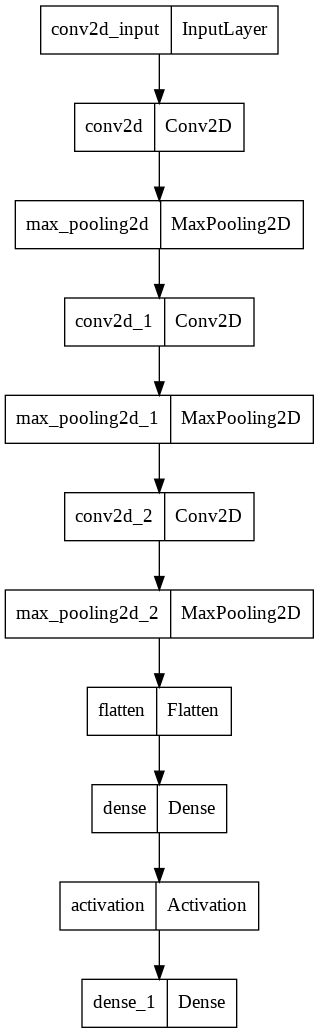

In [38]:
#obtenemos un diagrama del modelo empleado
plot_model(modelo,"model_I.png")

In [39]:
# Imprimimos un resumen del modelo a emplear

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [40]:
# ya teniendo todo listo, se procede a entrenar el modelo, a traves de la funcion fit y las variables de test y train

Resultado = modelo.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
6/6 [==============================] - 23s 3s/step - loss: 11.3220 - accuracy: 0.1750 - val_loss: 1.6754 - val_accuracy: 0.1500
Epoch 2/15
6/6 [==============================] - 20s 3s/step - loss: 1.5375 - accuracy: 0.3625 - val_loss: 1.5458 - val_accuracy: 0.2500
Epoch 3/15
6/6 [==============================] - 22s 4s/step - loss: 1.2905 - accuracy: 0.4250 - val_loss: 1.1217 - val_accuracy: 0.5750
Epoch 4/15
6/6 [==============================] - 22s 3s/step - loss: 0.6400 - accuracy: 0.8062 - val_loss: 0.5348 - val_accuracy: 0.7750
Epoch 5/15
6/6 [==============================] - 20s 3s/step - loss: 0.4530 - accuracy: 0.8313 - val_loss: 1.8577 - val_accuracy: 0.5750
Epoch 6/15
6/6 [==============================] - 20s 3s/step - loss: 0.8626 - accuracy: 0.8125 - val_loss: 0.6520 - val_accuracy: 0.6500
Epoch 7/15
6/6 [==============================] - 20s 3s/step - loss: 0.6289 - accuracy: 0.7625 - val_loss: 0.5689 - val_accuracy: 0.7500
Epoch 8/15
6/6 [=================

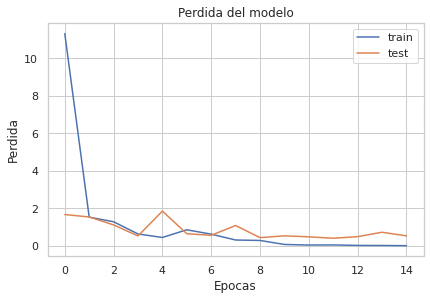

In [41]:
# Se procede a graficar los resultados obtenidos, en este caso se plotea una grafica de las perdidas del modelo.

plt.plot(Resultado.history['loss'])
plt.plot(Resultado.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend(['train', 'test'])
plt.show()

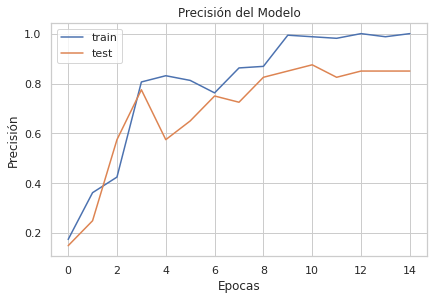

In [77]:

# De igual manera se plotea la grafica de precision del modelo

#En ella podemos notar un comportamiento aceptable y parecido.

plt.plot(Resultado.history['accuracy'])
plt.plot(Resultado.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['train', 'test'])
plt.show()

In [78]:
# Realizamos operaciones para poder calcular el error/perdida y la precision del modelo.
# podemos observar que el resultado de precision mejoro bastante, pasando de 60% a 85%, por lo que podremos empezar a realizar predicciones.
puntaje_modelo_1 = modelo.evaluate(x_test, y_test, verbose=0)
print('Test perdida de Modelo 2:', puntaje_modelo_1[0])
print('Test precision de Modelo 2:', puntaje_modelo_1[1])

Test perdida de Modelo 2: 0.5383797883987427
Test precision de Modelo 2: 0.8500000238418579


In [79]:
#Finalmente calculamos la matriz de confusion
matrix = confusion_matrix(y_test.argmax(axis = 1), modelo.predict(x_test).argmax(axis=1))
matrix

2/2 [==============================] - 1s 261ms/step


array([[4, 0, 0, 0, 1],
       [1, 8, 3, 0, 0],
       [0, 0, 6, 0, 0],
       [0, 1, 0, 9, 0],
       [0, 0, 0, 0, 7]])

In [80]:
# Lo que se realiza a continución es la comprobacion 

X = []
Z = []

i = 1
for dinosaur in dinosaurs:
  path2 = './test/' + dinosaur
  train_test_img(dinosaur, path2)


100%|██████████| 1/1 [00:00<00:00, 60.00it/s]


In [81]:
label_encoder2 = LabelEncoder()
Y = label_encoder2.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/255

In [82]:
prediction = modelo.predict(X)
pred_numbers = np.argmax(prediction, axis=1)
pred_numbers

1/1 [==============================] - 0s 194ms/step


array([3, 3, 2, 3, 4])

In [83]:
i = 0

corr_type =[]
mis_type = []

for i in range(len(Y)):
  if(np.argmax(Y[i]) == pred_numbers[i]):
    corr_type.append(i)

i = 0

for i in range(len(Y)):
  if(not np.argmax(Y[i]) == pred_numbers[i]):
    mis_type.append(i)

print(corr_type)
print(mis_type)

[2, 3, 4]
[0, 1]


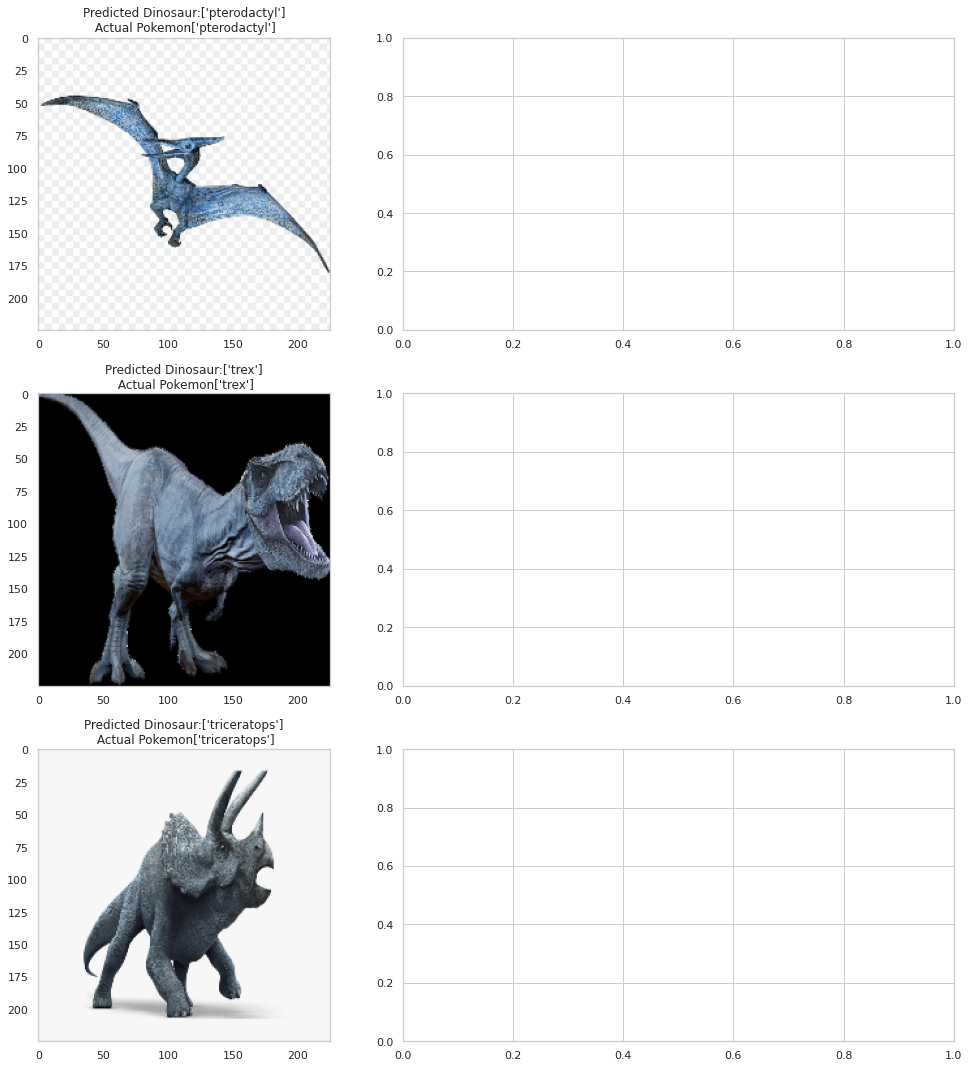

In [84]:
count=0
# fig,ax=plt.subplots(int(len(corr_type) / 2),2)
fig,ax=plt.subplots(len(corr_type),2)

fig.set_size_inches(15,15)
for i in range (len(corr_type)):
        ax[i,0].imshow(X[corr_type[count]])
        ax[i,0].set_title("Predicted Dinosaur:" + str(label_encoder2.inverse_transform([pred_numbers[corr_type[count]]])) + "\n Actual Pokemon" + str(label_encoder2.inverse_transform([np.argmax([Y[corr_type[count]]])])))
        ax[i,0].grid(None)
        plt.tight_layout()
        count+=1

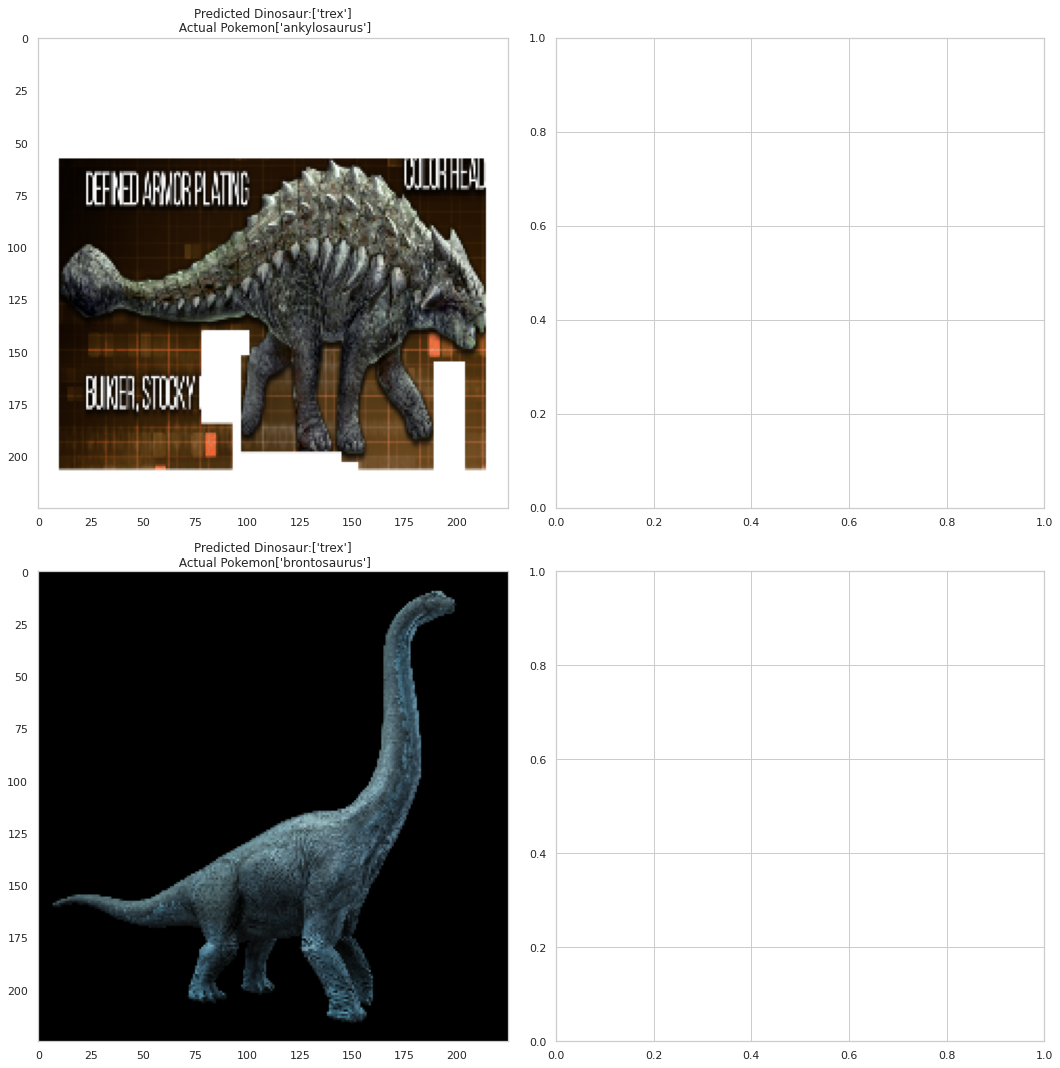

In [85]:
count=0
# fig,ax=plt.subplots(int(len(corr_type) / 2),2)
fig,ax=plt.subplots(len(mis_type),2)

fig.set_size_inches(15,15)
for i in range (len(mis_type)):
        ax[i,0].imshow(X[mis_type[count]])
        ax[i,0].set_title("Predicted Dinosaur:" + str(label_encoder2.inverse_transform([pred_numbers[mis_type[count]]])) + "\n Actual Pokemon" + str(label_encoder2.inverse_transform([np.argmax([Y[mis_type[count]]])])))
        ax[i,0].grid(None)
        plt.tight_layout()
        count+=1